In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('cropdata_updated.csv')

In [3]:
df.head()

,crop ID,soil_type,Seedling Stage,MOI,temp,humidity,result
0,Wheat,Black Soil,Germination,1,25,80.0,1
1,Wheat,Black Soil,Germination,2,26,77.0,1
2,Wheat,Black Soil,Germination,3,27,74.0,1
3,Wheat,Black Soil,Germination,4,28,71.0,1
4,Wheat,Black Soil,Germination,5,29,68.0,1


In [4]:
df.describe()

,MOI,temp,humidity,result
count,16411.000000,16411.000000,16411.000000,16411.000000
mean,43.695387,28.832612,63.487752,0.516178
std,27.160264,9.701465,22.630965,0.621691
min,1.000000,13.000000,15.000000,0.000000
25%,21.000000,20.000000,44.000000,0.000000
50%,41.000000,28.000000,69.200000,0.000000
75%,64.000000,37.000000,84.000000,1.000000
max,100.000000,46.000000,91.000000,2.000000


In [6]:
# encode crop ID, soil_type, Seedling Stage

le = LabelEncoder()
df['crop ID'] = le.fit_transform(df['crop ID'])
print(dict(zip(le.classes_, le.transform(le.classes_))))
df['soil_type'] = le.fit_transform(df['soil_type'])
print(dict(zip(le.classes_, le.transform(le.classes_))))
df['Seedling Stage'] = le.fit_transform(df['Seedling Stage'])
print(dict(zip(le.classes_, le.transform(le.classes_))))


{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7}


In [7]:
df.head()

,crop ID,soil_type,Seedling Stage,MOI,temp,humidity,result
0,4,1,2,1,25,80.0,1
1,4,1,2,2,26,77.0,1
2,4,1,2,3,27,74.0,1
3,4,1,2,4,28,71.0,1
4,4,1,2,5,29,68.0,1


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')

x = df.drop('result', axis=1)
y = df['result']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [9]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks=[earlyStopping])

Epoch 1/100
411/411 [==============================] - 3s 5ms/step - loss: 0.6524 - accuracy: 0.6795 - val_loss: 0.1631 - val_accuracy: 0.8486
Epoch 2/100
411/411 [==============================] - 2s 4ms/step - loss: 0.2276 - accuracy: 0.7959 - val_loss: 0.0391 - val_accuracy: 0.8550
Epoch 3/100
411/411 [==============================] - 2s 4ms/step - loss: 0.1038 - accuracy: 0.8261 - val_loss: -0.0676 - val_accuracy: 0.8635
Epoch 4/100
411/411 [==============================] - 2s 4ms/step - loss: -0.0550 - accuracy: 0.8411 - val_loss: -0.2095 - val_accuracy: 0.8785
Epoch 5/100
411/411 [==============================] - 2s 4ms/step - loss: -0.1660 - accuracy: 0.8384 - val_loss: -0.6222 - val_accuracy: 0.8809
Epoch 6/100
411/411 [==============================] - 1s 4ms/step - loss: -0.7723 - accuracy: 0.8396 - val_loss: -1.4792 - val_accuracy: 0.8635
Epoch 7/100
411/411 [==============================] - 2s 4ms/step - loss: -2.3770 - accuracy: 0.8259 - val_loss: -3.1126 - val_accurac

In [10]:
model.evaluate(x_test, y_test)

103/103 [==============================] - 0s 3ms/step - loss: -140406.9531 - accuracy: 0.8431


[-140406.953125, 0.8431313037872314]

In [11]:
model.save('crop_model.keras')

In [13]:
testing = pd.DataFrame([[4,1,2,5, 29,68]], columns=['crop ID', 'soil_type', 'Seedling Stage', 'fertilizer', 'temperature', 'humidity'])
model.predict(testing)


1/1 [==============================] - 0s 71ms/step


array([[0.5231022]], dtype=float32)

103/103 [==============================] - 0s 2ms/step


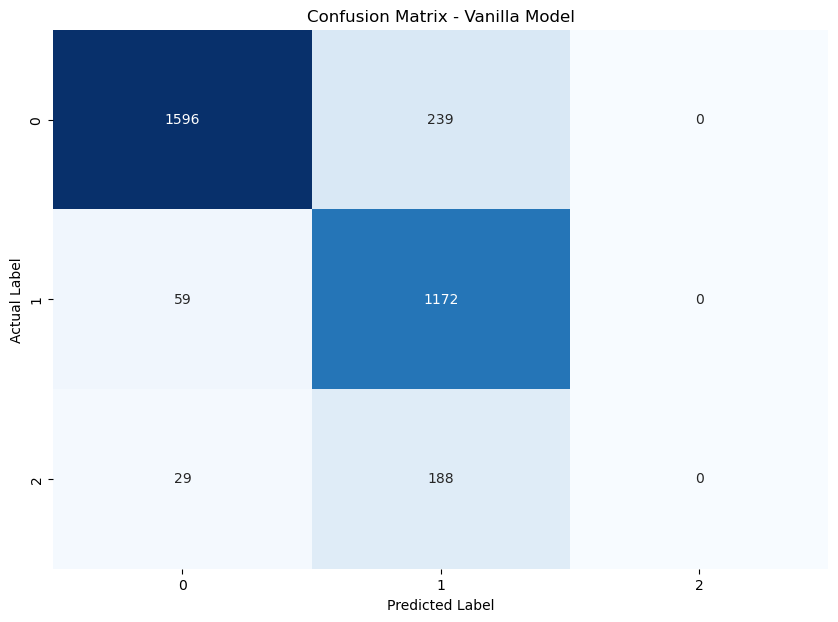

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test is defined elsewhere in the notebook
# y_test: true labels

# Predict the labels for the test set
Y_pred_vanilla = model.predict(x_test)
Y_pred_vanilla = (Y_pred_vanilla > 0.5).astype(int)

# Calculate the confusion matrix
vanilla_conf_matrix = confusion_matrix(y_test, Y_pred_vanilla)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(vanilla_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Vanilla Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
